### Are bottom-up SaaS companies more capital efficient?

We analyze B2B SaaS IPOs from 2013-2019 and score them on capital efficiency

In [427]:
import importlib
import b2b_saas_ipo

In [428]:

importlib.reload(b2b_saas_ipo)
from b2b_saas_ipo import *


df_main = main(filename='data/ipo_db.csv')
df_main["all"]=""
df = df_main[((df_main.type=='Top-Down SaaS') | (df_main.type == 'Bottom-Up SaaS')) & (df_main.type.notna())]

sns.set()
#sns.set_style("whitegrid", {
#    "ytick.major.size": 0.1,
#    "ytick.minor.size": 0.05,
#    'grid.linestyle': '--'
# })
%precision %.2f
plt.style.use('fivethirtyeight')


from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def describe_col_by_type(df,var):
    df_t=df[df[var].notna()]
    display(df_t.groupby(['type'])[var].describe())

    
def list_by_quantile(df,c,percentile,op='>'):
    
    #q2 = np.series(df[df[c].notna()][c]).quantile(percentile)
    q = df[df[c].notna()][c].quantile(percentile)
    print('q=',q)
    #print('q2=',q2)
    if (op == '>'):
        f = df[df[c]>=q][[c,'type']]
        display(f.sort_values(c,ascending=True))

    else:
        f = df[df[c]<q][[c,'type']]
        display(f.sort_values(c,ascending=True))
     
    
    b_n = f[f['type'] == 'Bottom-Up SaaS'].shape[0]
    t_n = f[f['type'] == 'Top-Down SaaS'].shape[0]
    n = b_n + t_n
    display('Total (N = {}) Bottom Up = {} ({:.1f}%) Top Down = {} ({:.1f}%)'
            .format(n,b_n,(b_n/n*100),t_n,(t_n/n*100)))
    

4 companies missing: rev_growth
6 companies missing: arr__m
9 companies missing: arr_growth
8 companies missing: net_cash
3 companies missing: capital_raised

Total companies (N) = 48


# [Analysis I] Market cap and Net Capital Raised

Bottom-up SaaS companies have a median market cap (as of date) of $XX M which is [x]% higher than the median for top-down SaaS companies


At IPO Bottom-up SaaS companies have raised $X M (net of cash on BS) which [x]% less than the median for top-down SaaS companies @ IPO

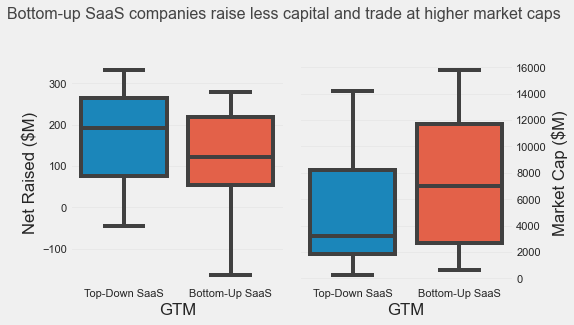

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bottom-Up SaaS,17.00,237.21,367.55,-164.00,55.22,122.50,219.00,"1,455.00"
Top-Down SaaS,21.00,201.49,196.09,-45.00,77.00,192.25,264.39,785.00


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bottom-Up SaaS,17.00,"9,730.24","10,148.58",607.00,"2,708.00","7,021.00","11,670.00","34,733.00"
Top-Down SaaS,22.00,"8,414.77","11,879.14",252.00,"1,866.75","3,246.00","8,184.50","50,306.00"


In [380]:
f, axes = plt.subplots(1, 2, sharey=False, figsize=(8,4))
f.subplots_adjust(wspace=0.5)
saas_box_plot(df,'net_raised','GTM','Net Raised (\$M)',axes[0],plot_type='box',title = '',axis='left')
saas_box_plot(df,'market_cap__m','GTM','Market Cap (\$M)',axes[1],plot_type='box',title='',axis='right')
f.tight_layout()
#plt.suptitle('Bottom-up SaaS outperforms Top-down SaaS')
#f.text(x = 0.001, y = 1.1, s = "Bottom-up SaaS outperforms Top-down SaaS",
#               fontsize = 20, weight = 'bold', alpha = .75,color='black')
f.text(x = 0.001, y = 1.03, s = "Bottom-up SaaS companies raise less capital and trade at higher market caps\n",
               fontsize = 16, alpha = .85)

plt.show()
describe_col_by_type(df,'net_raised')
describe_col_by_type(df,'market_cap__m')


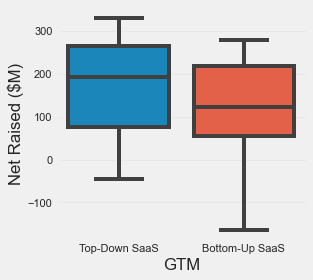

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bottom-Up SaaS,17.00,237.21,367.55,-164.00,55.22,122.50,219.00,"1,455.00"
Top-Down SaaS,21.00,201.49,196.09,-45.00,77.00,192.25,264.39,785.00


In [368]:
f, axes = plt.subplots(1, 1, sharey=False, figsize=(4,4))
f.subplots_adjust(wspace=0.5)
saas_box_plot(df,'net_raised','GTM','Net Raised (\$M)',axes,plot_type='box',title = '',axis='left')


#saas_box_plot(df,'market_cap__m','GTM','Market Cap (\$mm)',axes[1],plot_type='box',title='',axis='left')
#f.tight_layout()
#plt.suptitle('Bottom-up SaaS outperforms Top-down SaaS')
#f.text(x = 0.001, y = 1.1, s = "Bottom-up SaaS outperforms Top-down SaaS",
#               fontsize = 20, weight = 'bold', alpha = .75,color='black')
#f.text(x = 0.001, y = 1.03, s = "Bottom-up SaaS companies raise less capital and trade at higher market caps",
#               fontsize = 16, alpha = .85)

plt.show()
describe_col_by_type(df,'net_raised')


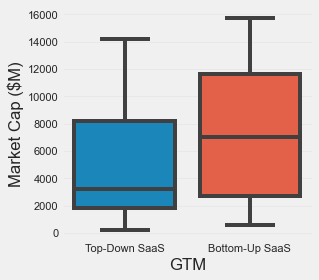

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bottom-Up SaaS,17.00,"9,730.24","10,148.58",607.00,"2,708.00","7,021.00","11,670.00","34,733.00"
Top-Down SaaS,22.00,"8,414.77","11,879.14",252.00,"1,866.75","3,246.00","8,184.50","50,306.00"


In [369]:
f, axes = plt.subplots(1, 1, sharey=False, figsize=(4,4))
f.subplots_adjust(wspace=0.5)
saas_box_plot(df,'market_cap__m','GTM','Market Cap (\$M)',axes,plot_type='box',title = '',axis='left')


#saas_box_plot(df,'market_cap__m','GTM','Market Cap (\$mm)',axes[1],plot_type='box',title='',axis='left')
#f.tight_layout()
#plt.suptitle('Bottom-up SaaS outperforms Top-down SaaS')
#f.text(x = 0.001, y = 1.1, s = "Bottom-up SaaS outperforms Top-down SaaS",
#               fontsize = 20, weight = 'bold', alpha = .75,color='black')
#f.text(x = 0.001, y = 1.03, s = "Bottom-up SaaS companies raise less capital and trade at higher market caps",
#               fontsize = 16, alpha = .85)

plt.show()
describe_col_by_type(df,'market_cap__m')

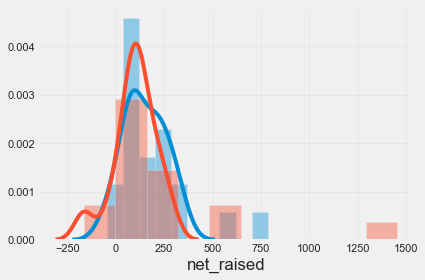

In [348]:
sns.distplot(df[df.net_raised.notna() & (df.type=='Top-Down SaaS')].net_raised,hist=True,kde_kws={'clip': (-250, 500)},bins=10)
#,ax=f1_axes[2])
sns.distplot(df[df.net_raised.notna() & (df.type=='Bottom-Up SaaS')].net_raised,hist=True,kde_kws={'clip': (-250, 500)},bins=10)



# [Analysis II] Burn efficiency 

Capital efficiency = ARR / total capital raise

This metric is a rough proxy for how much a company spent for its revenue. It has the nice property of capturing the aggregate capital efficiency of a business from inception to IPO.

Some prefer to subtract cash from the denominator to adjust for companies that have significant cash balances but are otherwise capital efficient. We chose not to do this for two reasons:

    (1.) Subtracting cash can lead to a negative denominator, making comparisons across the dataset impossible.
    
    (2.) A large cash balance can point to sub-optimal capital allocation: the cash on the balance sheet is not being put to productive use. Our metric can be thought of as a blended measure of both capital efficiency and capital allocation.


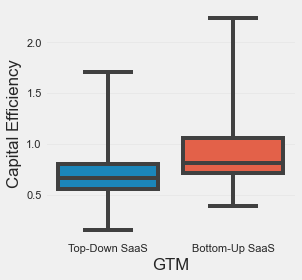

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Bottom-Up SaaS,17.00,1.07,0.69,0.39,0.72,0.81,1.05,2.90
Top-Down SaaS,21.00,1.61,4.11,0.15,0.56,0.66,0.80,19.46


In [370]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(4, 4))
f.subplots_adjust(wspace=0.5)

saas_box_plot(df,'cap_ef','GTM','Capital Efficiency',axes,plot_type='box',axis='left',showfliers=False,whis=5)
#saas_box_plot(df,'cap_ef_cash','GTM','Capital Efficiency',axes[1],plot_type='box',axis='left',showfliers=False,whis=2.7)
#saas_box_plot(df,'arr_ef','','Burn rate',axes[1],plot_type='box',axis='right')
#f.tight_layout()
#f.text(x = 0.001, y = 1.1, s = "Bottom-up SaaS companies are more efficient",
#               fontsize = 20, weight = 'bold', alpha = .75,color='black')
#f.text(x = 0.03, y = 1.05, s = "Bottom-up SaaS companies tend to spend less to generate revenue",
#               fontsize = 16, alpha = .85)
#f.text(x = 0.2, y = 1.015, s=  "(Burn rate = capital spent to generate $100 in ARR)",
#               fontsize = 12, alpha = .85)

plt.show()
#describe_col_by_type(df,'rev_ef')
describe_col_by_type(df,'cap_ef')



In [350]:
df.sort_values('cap_ef',ascending=False).head(12)[['market_cap__m','net_raised','capital_raised','p_cash','net_cash','arr__m','arr_ef','cap_ef']]

,market_cap__m,net_raised,capital_raised,p_cash,net_cash,arr__m,arr_ef,cap_ef
ticker,,,,,,,,
VEEV,"23,159.00",-45.00,7.00,52.00,52.00,136.25,-0.33,19.46
ZM,"34,733.00",-30.00,146.00,176.00,176.00,423.00,-0.07,2.90
DDOG,"10,265.00",95.90,147.90,52.00,52.00,332.00,0.29,2.24
TEAM,"33,320.00",-164.00,59.00,223.00,223.00,121.00,-1.36,2.05
WK,"1,455.00",45.58,55.58,10.00,10.00,94.76,0.48,1.70
NOW,"50,306.00",-2.25,83.70,85.95,85.95,138.22,-0.02,1.65
ESTC,"4,080.00",111.00,162.00,51.00,51.00,196.00,0.57,1.21
ZS,"8,036.00",77.00,148.00,71.00,71.00,179.00,0.43,1.21
ZEN,"6,994.00",45.65,85.50,39.85,39.85,90.00,0.51,1.05


<ipython-input-448-60664c6433cb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_v2 = df_t[df.name!='VEEV'].sort_values('cap_ef')


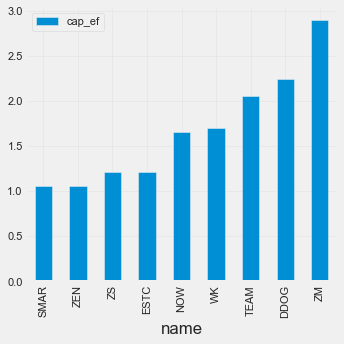

In [448]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(5, 5))
f.subplots_adjust(wspace=0.5)
df_t = df[df.cap_ef>=df.cap_ef.quantile(0.75)]
#df_v1 = (df_t[(df_t['arr_growth'].notna())]).sort_values('arr_growth',ascending=True)
df_v2 = df_t[df.name!='VEEV'].sort_values('cap_ef')
#& (df_t.type == 'Top-Down SaaS')
df_v2.plot.bar(x='name',y='cap_ef',ax=axes)
#df_v2.plot.scatter(x='cap_ef',y='arr_growth',ax=axes)
f.tight_layout()
#f.text(x = 0.001, y = 1.1, s = "Capital efficiency without sacrificing top-line growth",
#               fontsize = 20, weight = 'bold', alpha = .75,color='black')
#f.text(x = 0.001, y = 1.03, s = "The top quartile by capital efficiency also have strong ARR growth",
#               fontsize = 16, alpha = .85)

plt.show()

> AND it doesn\'t come at the expense of growth. In other words, the best-in class bottom-up SaaS companies from a burn efficiency standpoint don't tradeoff efficiency for growth. There are three companies (SolarWinds, Ping Indentity, XXX) in this list with high efficiency but low-growth and unsurprisingly the were all PE owned companies that went public. All the others in this list have high growth rates ("x over median") <br>
> Of course, none of this is to suggest any causality between growth and efficiency but instead that it is possible to build a fast growing business that is also capital efficient

<ipython-input-353-359ba967ef24>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_v2 = df_v1[df.name!='VEEV']


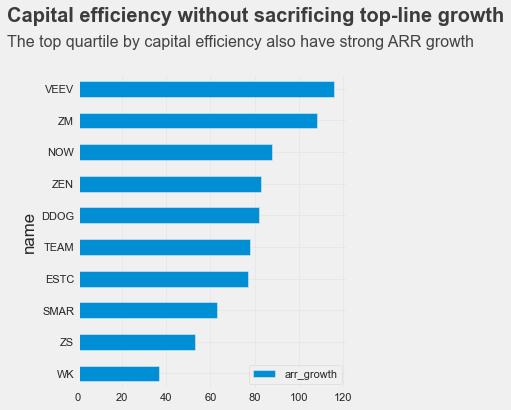

In [353]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(5, 5))
f.subplots_adjust(wspace=0.5)
df_t = df[df.cap_ef>=df.cap_ef.quantile(0.75)]
df_v1 = (df_t[(df_t['arr_growth'].notna())]).sort_values('arr_growth',ascending=True)
df_v2 = df_v1[df.name!='VEEV']
#& (df_t.type == 'Top-Down SaaS')
df_v1.plot.barh(x='name',y='arr_growth',ax=axes)
#df_v2.plot.scatter(x='cap_ef',y='arr_growth',ax=axes)
f.tight_layout()
f.text(x = 0.001, y = 1.1, s = "Capital efficiency without sacrificing top-line growth",
               fontsize = 20, weight = 'bold', alpha = .75,color='black')
f.text(x = 0.001, y = 1.03, s = "The top quartile by capital efficiency also have strong ARR growth",
               fontsize = 16, alpha = .85)


plt.show()

# High prevalance of Bottom-up SaaS companies in upper quartiles


In [440]:
def saas_stacked_chart(df,param,q=4,reverse=False):
    df_t = df
    with ChainedAssignent():
        df_t['q']= pd.qcut(df_t[param],q)

    labels = list()
    for i in range(q):
        labels.append(str(i))

    bot = np.array(df_t[df_t.type=='Bottom-Up SaaS'].groupby('q')[param].count())
    top = np.array(df_t[df_t.type=='Top-Down SaaS'].groupby('q')[param].count())

    print(bot,top)
    bot_f = bot/(bot+top)*100
    top_f = top/(bot+top)*100

    if reverse:
        bot_f = bot_f[::-1]
        top_f = top_f[::-1]
        
    # Data
    x=['Worst','',' ','Best']
    y=[]
    y.append(bot_f)
    y.append(top_f)
    return (x,y)
    

[3 2 6 6] [7 7 3 4]
[7 4 2 3] [3 5 7 7]
[2 2 6 4] [6 6 1 2]


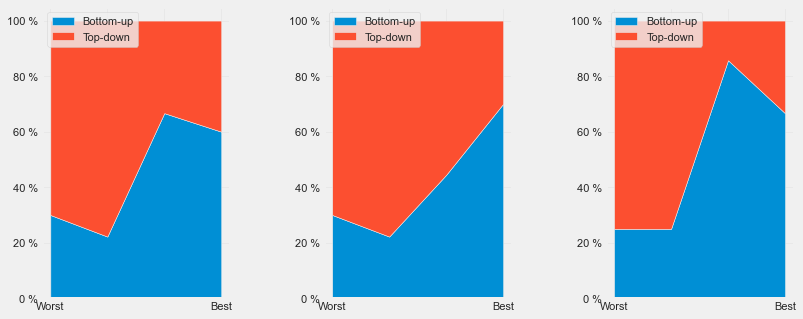

In [443]:
f, axes = plt.subplots(1, 3, sharey=False, figsize=(12,5))
f.subplots_adjust(wspace=0.5)
x,y = saas_stacked_chart(df,'cap_ef',reverse=False)
axes[0].stackplot(x,y,labels=['Bottom-up','Top-down'])
axes[0].legend(loc='upper left')
axes[0].yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))

x,y = saas_stacked_chart(df,'ltm_median_payback_period',reverse=True)
axes[1].stackplot(x,y,labels=['Bottom-up','Top-down'])
axes[1].legend(loc='upper left')
axes[1].yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))

x,y = saas_stacked_chart(df,'net_dollar_retention')
axes[2].stackplot(x,y,labels=['Bottom-up','Top-down'])
axes[2].legend(loc='upper left')
axes[2].yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))



plt.show()


<Figure size 432x288 with 0 Axes>

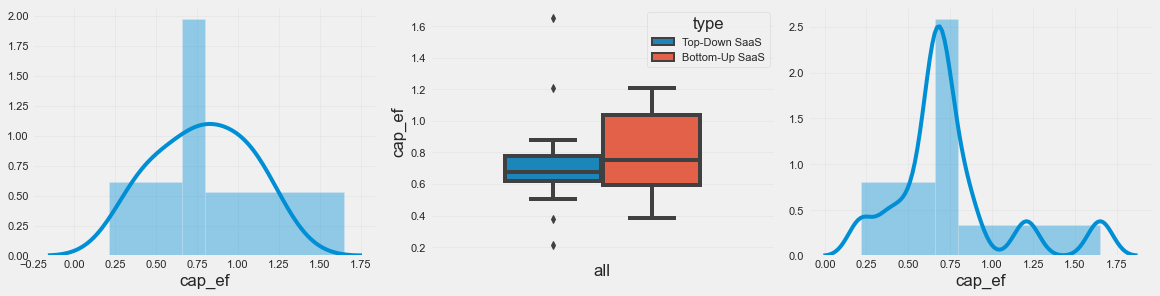

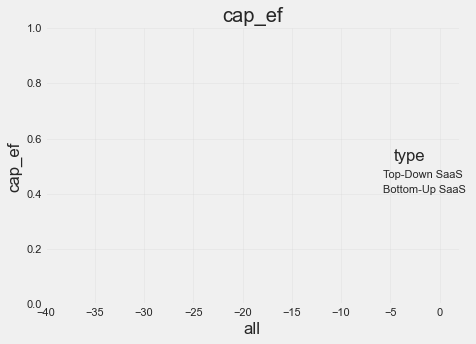

N = 25


In [451]:
saas_plot_hist('cap_ef',
               df=df,
               x_min=-40,x_lim=2,bins=3,
               param='cap_ef')

# Net Dollar Retention

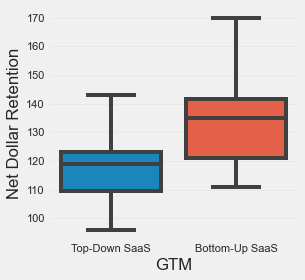

In [367]:
f, axes = plt.subplots(1, 1, sharey=False, figsize=(4, 4))
saas_box_plot(df,'net_dollar_retention','GTM','Net Dollar Retention',axes)
#saas_box_plot(df[df.net_dollar_retention < (df.net_dollar_retention.quantile([0.10,0.25,0.5,0.75]))[0.75]]
#                 ,'net_dollar_retention','','Net Dollar Retention',axes[1])
plt.show()



In [25]:
describe_col_by_type(df,'net_dollar_retention')

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bot_up_ent,14.00,134.00,15.66,111.00,121.00,135.00,141.50,170.00
top_down_ent,15.00,119.40,14.47,96.00,109.50,119.00,123.00,147.00


In [187]:
df.sort_values('net_dollar_retention',ascending=False).net_dollar_retention

ticker
TWLO   170.00
TEAM   148.00
CRWD   147.00
DDOG   146.00
CLDR   143.00
ESTC   142.00
ZM     140.00
PD     140.00
WORK   138.00
AYX    135.00
FSLY   132.00
SMAR   130.00
TLND   124.00
OKTA   123.00
PLAN   123.00
ZS     122.00
QUAL   122.00
MDB    120.00
ZEN    120.00
YEXT   119.00
MDLA   119.00
BL     118.00
NEWR   115.00
NET    111.00
ZUO    110.00
AVLR   109.00
DOMO   105.00
INST   100.00
NOW     96.00
COUP      nan
DOCU      nan
VEEV      nan
RPD       nan
PS        nan
TENB      nan
WK        nan
SVMK      nan
WDAY      nan
DBX       nan
MULE      nan
Name: net_dollar_retention, dtype: float32

# LTM Median Payback Period

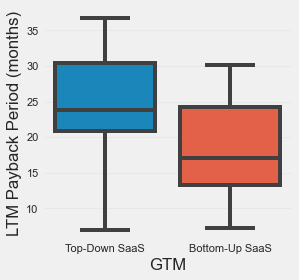

In [371]:
f, axes = plt.subplots(1, 1, sharey=False, figsize=(4, 4))
saas_box_plot(df,'ltm_median_payback_period','GTM','LTM Payback Period (months)',axes)
#saas_box_plot(df[df.ltm_median_payback_period < (df.ltm_median_payback_period.quantile([0.10,0.25,0.5,0.75]))[0.25]]
#                 ,'ltm_median_payback_period','','LTM Median Payback Period',axes[1])
plt.show()



In [185]:
describe_col_by_type(df,'ltm_median_payback_period')
print('Top quartile:')
q = df.ltm_median_payback_period.quantile([0.10,0.25,0.5,0.75])[0.25]
df_q=df[df.ltm_median_payback_period < q]
df_q.sort_values('ltm_median_payback_period').ltm_median_payback_period

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bot_up_ent,16.00,20.39,11.47,7.20,13.33,17.00,24.22,46.20
top_down_ent,22.00,26.20,11.19,7.00,20.90,23.75,30.48,56.00


Top quartile:


ticker
VEEV    7.00
TEAM    7.20
TWLO   10.40
ZM     10.70
DDOG   11.30
NOW    13.00
ESTC   14.00
WORK   14.00
ZEN    14.70
WDAY   14.70
Name: ltm_median_payback_period, dtype: float32

# Cluster analysis


In [326]:
def numerify_type(df):
    df_km = df
    df_km['num_type']=0
    df_c_b = df_km[df_km.type == 'bot_up_ent']
    df_c_t = df_km[df_km.type == 'top_down_ent']
    df_c_t['num_type']=1
    df_km = pd.concat([df_c_b,df_c_t],axis=0)
    return df_km

from sklearn import metrics
from sklearn.cluster import KMeans

filter_cols = ['arr_ef', 'arr_growth']
df_c0 = df[df.arr_ef<df.arr_ef.quantile(0.25)]
l = len(filter_cols)
df_c = df_c0[filter_cols]
for c in filter_cols:
    df_c = df_c[df_c[c].notna()]

if ('type' in filter_cols):
    df_c = numerify_type(df_c)
    df_c = df_c.drop('type', 1)

x = df_c.iloc[:, list(range(l))].values
clusters=2
kmeans = KMeans(n_clusters = clusters) 
y = kmeans.fit_predict(x) 
  
print(kmeans.labels_)
print(kmeans.cluster_centers_)


[0 0 0 0 0 0 1 1]
[[  0.11880159  92.481064  ]
 [-15.342388    20.5       ]]


In [36]:
df[(df.type=='Bottom-Up SaaS')].net_dollar_retention.sort_values(ascending=False)

ticker
TWLO   170.00
TEAM   148.00
DDOG   146.00
ESTC   142.00
PD     140.00
ZM     140.00
WORK   138.00
SMAR   130.00
TLND   124.00
ZEN    120.00
MDB    120.00
NEWR   115.00
NET    111.00
DOCU      nan
SVMK      nan
DBX       nan
SWI       nan
Name: net_dollar_retention, dtype: float32

In [457]:
df_r=df
print("---------  Top-down GTM -----------")
print(saas_reg(df_r,['cap_ef','capital_raised'],'arr__m',use_b=True,log_x=[False,False],log_y=False))


---------  Top-down GTM -----------
                            OLS Regression Results                            
Dep. Variable:                 arr__m   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     30.74
Date:                Thu, 14 May 2020   Prob (F-statistic):           1.97e-08
Time:                        10:27:58   Log-Likelihood:                -236.35
No. Observations:                  38   AIC:                             478.7
Df Residuals:                      35   BIC:                             483.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const   